In [1]:
import pickle as pkl

import numpy as np
import torch
import matplotlib.pyplot as plt

In [25]:
# path for loading
path = '/Users/vigoro/SCL_cleaned_code/scl/saved/rd/2025-01-22 04:57:06_scl_m_rd'
eps = 1e-2

In [3]:
# load state dict
with open(path + '/state_dict.pkl', 'rb') as f:
    state_dict = pkl.load(f)

pde_param = [key.split('_')[-1] for key in state_dict['Relative Error'].keys()][0]

slacks = state_dict['slacks']['slack_0']
primal_values = state_dict['primal_value']
duality_gaps = state_dict['approximate_duality_gap']
lagrangians = state_dict['Lagrangian']
rel_errors = state_dict['Relative Error'][f'Relative Error_pde_param_{pde_param}']
abs_errors = state_dict['Absolute Error'][f'Absolute Error_pde_param_{pde_param}']
linf_errors = state_dict['linf Error'][f'linf Error_pde_param_{pde_param}']

slacks = np.array(slacks)
primal_values = np.array(primal_values)
duality_gaps = np.array(duality_gaps)
lagrangians = np.array(lagrangians)

eval_every = 100
epochs = 100000

In [4]:
# final epoch
print(f'Relative Error: {rel_errors[-1]}')

Relative Error: 0.004739966670777934


In [26]:
# feasible with smallest objective value

# find best checkpoint based on feasibility (withing 1.1 eps but can be changed) plus small objective
# slacks already incorporate eps so it's only less than 0.1 eps
feasibility_mask = (slacks < 0.1 * eps)  

# find the best feasible epoch based on the smallest primal value
best_idx = np.argmin(primal_values[feasibility_mask]) if np.any(feasibility_mask) else None

if best_idx is not None:
    best_epoch = np.where(feasibility_mask)[0][best_idx]  # Get the actual epoch index
    best_primal_value = primal_values[best_epoch]
    
    idx_errors = int(best_epoch / eval_every)
    best_rel_l2_error = rel_errors[idx_errors]
    best_abs_error = abs_errors[idx_errors]
    best_linf_error = linf_errors[idx_errors]

print(f'Best feasible epoch: {best_epoch}')
print(f'Relative L2 error for best epoch: {best_rel_l2_error}')

Best feasible epoch: 90293
Relative L2 error for best epoch: 0.010211016523212754


In [28]:
# feasible with smallest objective value after a certain epoch

# define the threshold epoch
threshold_epoch = 80000

# define feasibility criteria: slacks within 0.1 * eps
feasibility_mask = (slacks < 0.1 * eps)

# Ensure only epochs after the threshold are considered
valid_indices = (np.arange(len(slacks)) >= threshold_epoch) & feasibility_mask

# Find the best feasible epoch with the smallest primal value
if np.any(valid_indices):  # Ensure there are valid feasible epochs
    best_idx = np.argmin(primal_values[valid_indices])
    best_epoch = np.where(valid_indices)[0][best_idx]  # Get the actual epoch index
    best_primal_value = primal_values[best_epoch]

    idx_errors = int(best_epoch / eval_every)
    best_rel_l2_error = rel_errors[idx_errors]

    print(f'Best feasible epoch after {threshold_epoch}: {best_epoch}')
    print(f'Smallest feasible primal value: {best_primal_value}')
    print(f'Relative L2 error for best epoch: {best_rel_l2_error}')
else:
    print(f'No feasible epochs found after {threshold_epoch}')



Best feasible epoch after 80000: 90293
Smallest feasible primal value: 1.3452599922914033e-08
Relative L2 error for best epoch: 0.010211016523212754


In [17]:
# epochs_plot = np.arange(1, epochs + 1)
# epochs_plot = epochs_plot[feasibility_mask]
# primal_values_plot = primal_values[feasibility_mask]

#  # plot
# plt.figure()
# plt.plot(epochs_plot, primal_values_plot)
# plt.xlabel('Epoch')
# plt.ylabel('Primal Value')

In [18]:
# # plot slacks
# plt.figure()
# plt.plot(slacks)
# plt.xlabel('Epoch')
# plt.ylabel('Slack')

In [24]:
# # plot lagrangians
# plt.figure()
# plt.plot(lagrangians)
# plt.xlabel('Epoch')
# plt.ylabel('Lagrangian')

Text(0, 0.5, 'Relative Error')

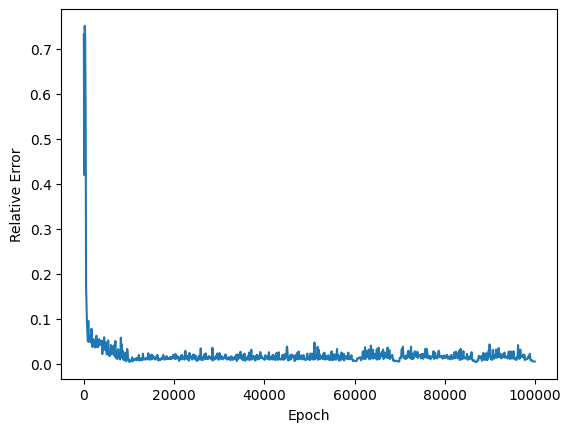

In [21]:
# plot relative errors
epochs_plot = np.arange(0, epochs, eval_every) + 1
plt.figure()
plt.plot(epochs_plot, rel_errors)
plt.xlabel('Epoch')
plt.ylabel('Relative Error')

In [ ]:
# smallest lagrangian

# Find the epoch with the smallest Lagrangian value and teh corresponding relative L2 error
best_epoch = np.argmin(lagrangians)
best_lagrangian_value = lagrangians[best_epoch]

idx_errors = int(best_epoch / eval_every)
best_rel_l2_error = rel_errors[idx_errors]

print(f'Best epoch: {best_epoch}')
print(f'Smallest Lagrangian value: {best_lagrangian_value}')
print(f'Relative L2 error for best epoch: {best_rel_l2_error}')

Best epoch: 9057
Smallest Lagrangian value: -0.0005489179166033864
Relative L2 error for best epoch: 0.010790719965631017


In [22]:
# smallest Lagrangian after some threshold epoch

# define the threshold epoch
threshold_epoch = 80000

# consider only epochs after the threshold
valid_indices = np.arange(len(lagrangians)) >= threshold_epoch

# find the best epoch with the smallest Lagrangian after the threshold
if np.any(valid_indices):  # ensure there are valid epochs
    best_idx = np.argmin(lagrangians[valid_indices])
    best_epoch = np.where(valid_indices)[0][best_idx]  # Get the actual epoch index
    best_lagrangian_value = lagrangians[best_epoch]

    idx_errors = int(best_epoch / eval_every)
    best_rel_l2_error = rel_errors[idx_errors]

    print(f'Best epoch after {threshold_epoch}: {best_epoch}')
    print(f'Smallest Lagrangian value: {best_lagrangian_value}')
    print(f'Relative L2 error for best epoch: {best_rel_l2_error}')
else:
    print(f'No epochs found after {threshold_epoch}')


Best epoch after 80000: 86131
Smallest Lagrangian value: -0.0001744067412801087
Relative L2 error for best epoch: 0.008343890842691878
